In [1]:
!pip install pytreebank


  Created wheel for pytreebank: filename=pytreebank-0.2.7-cp37-none-any.whl size=37070 sha256=f7a43175c8cb5cbed5d65facf9ece8c5fee8b72620dd5bab72b598d0211e38fd
  Stored in directory: /root/.cache/pip/wheels/e0/b6/91/e9edcdbf464f623628d5c3aa9de28888c726e270b9a29f2368
Successfully built pytreebank


In [ ]:
#!pip install google-trans-new

In [2]:
import pytreebank
# load the sentiment treebank corpus in the parenthesis format,
# e.g. "(4 (2 very ) (3 good))"
dataset = pytreebank.load_sst()
# add Javascript and CSS to the Ipython notebook
#pytreebank.LabeledTree.inject_visualization_javascript()
# select and example to visualize
#example = dataset["train"][0]
# display it in the page
#example.text


In [ ]:
len(dataset['train']), len(dataset['test']), len(dataset['dev'])

(8544, 2210, 1101)

In [ ]:
#example = dataset['dev']

In [3]:
full_data = []
for example in dataset["train"]:
  i= 0
  for label, sentence in example.to_labeled_lines():
    full_data.append((sentence, label))
    break
for example in dataset["dev"]:
  i= 0
  for label, sentence in example.to_labeled_lines():
    full_data.append((sentence, label))
    break

for example in dataset["test"]:
  i= 0
  for label, sentence in example.to_labeled_lines():
    full_data.append((sentence, label))
    break


Counter({1: 3140, 3: 3111, 2: 2242, 4: 1852, 0: 1510})


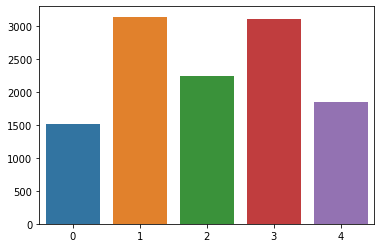

In [4]:
import collections

x,y = list(zip(*full_data))
count  = collections.Counter(y)
print(count)
import seaborn as sns

#x=tweet.target.value_counts()
x = list(count.keys())
y = list(count.values())
sns.barplot(x=x,y=y)

In [ ]:
len(full_data)

11855

In [5]:
def get_separate_labels(text,label):
  return[x for x in text if x[1]==label]
def get_split(list,perc):
  return int(perc*len(list))

In [6]:
split_per = get_split(full_data,0.8)
train_list = full_data[:split_per]
test_list = full_data[split_per:]

In [7]:
import collections

x,y = list(zip(*train_list))
count  = collections.Counter(y)
count

Counter({0: 1194, 1: 2416, 2: 1828, 3: 2593, 4: 1453})

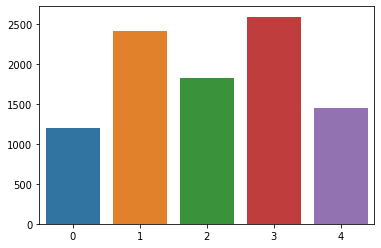

In [8]:

import seaborn as sns

#x=tweet.target.value_counts()
x = list(count.keys())
y = list(count.values())
sns.barplot(x=x,y=y)
#plt.gca().set_ylabel('samples')

In [9]:
import collections

x,y = list(zip(*test_list))
count  = collections.Counter(y)
count


Counter({0: 316, 1: 724, 2: 414, 3: 518, 4: 399})

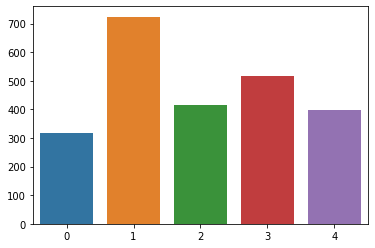

In [10]:
import seaborn as sns

#x=tweet.target.value_counts()
x = list(count.keys())
y = list(count.values())
sns.barplot(x=x,y=y)
#plt.gca().set_ylabel('samples')

In [11]:
very_negative_list = get_separate_labels(train_list,0)
negative_list = get_separate_labels(train_list,1)
neutral_list = get_separate_labels(train_list,2)
positive_list = get_separate_labels(train_list,3)
very_positive = get_separate_labels(train_list,4)

In [12]:
import random
aug_list = [ x
            for label_list in [random.sample(very_negative_list,get_split(very_negative_list,1)),
                   random.sample(negative_list, get_split(negative_list,0.1)),
                   random.sample(neutral_list,get_split(neutral_list,0.1)),
                   random.sample(positive_list, get_split(positive_list,0.4)),
                   random.sample(very_positive, get_split(very_positive,0.8))]
                   for x in label_list ]


In [ ]:
aug_list[0]

('Should have gone straight to video .', 0)

In [ ]:

very_negative_list[80]

("Stealing Harvard does n't care about cleverness , wit or any other kind of intelligent humor .",
 0)

In [ ]:
for label, sentence in example.to_labeled_lines():
	print("%s has sentiment label %s" % (
		sentence,
		["very negative", "negative", "neutral", "positive", "very positive"][label]
	))

( U ) nrelentingly stupid . has sentiment label very negative
( U ) has sentiment label neutral
( has sentiment label negative
U ) has sentiment label neutral
U has sentiment label neutral
) has sentiment label positive
nrelentingly stupid . has sentiment label very negative
nrelentingly stupid has sentiment label very negative
nrelentingly has sentiment label neutral
stupid has sentiment label very negative
. has sentiment label neutral


In [13]:
import random
import torch, torchtext
from torchtext.legacy import data


In [14]:
def random_insertion(sentence, n): 
    words = remove_stopwords(sentence) 
    for _ in range(n):
        new_synonym = get_synonyms(random.choice(words))
        sentence.insert(randrange(len(sentence)+1), new_synonym) 
    return sentence

In [15]:
def random_deletion(words, p=0.5): 
    if len(words) == 1: # return if single word
        return words
    remaining = list(filter(lambda x: random.uniform(0,1) > p,words)) 
    if len(remaining) == 0: # if not left, sample a random word
        return [random.choice(words)] 
    else:
        return remaining

In [16]:
def random_swap(sentence, n=5): 
    length = range(len(sentence)) 
    for _ in range(n):
        idx1, idx2 = random.sample(length, 2)
        sentence[idx1], sentence[idx2] = sentence[idx2], sentence[idx1] 
    return sentence

In [17]:
!pip install googletrans==3.1.0a0

     |████████████████████████████████| 61kB 3.3MB/s 
     |████████████████████████████████| 51kB 6.3MB/s 
     |████████████████████████████████| 1.0MB 8.4MB/s 
     |████████████████████████████████| 71kB 8.5MB/s 
     |████████████████████████████████| 61kB 7.2MB/s 
  Created wheel for googletrans: filename=googletrans-3.1.0a0-cp37-none-any.whl size=16368 sha256=07e0ba0659a294b3ea662e433b4d4bea434c12d50fcee64fbf3deca6b6472271
  Stored in directory: /root/.cache/pip/wheels/27/7a/a0/aff3babbb775549ce6813cb8fa7ff3c0848c4dc62c20f8fdac
Successfully built googletrans


In [18]:
import random
import googletrans
from googletrans import Translator
#import google_trans_new 
#from google_trans_new import google_translator  

def back_translator(sentence):
  translator = Translator()
  #translator = google_translator()
  #sentence = ['']

  available_langs = list(googletrans.LANGUAGES.keys()) 
  trans_lang = random.choice(available_langs) 
  #print(f"Translating to {googletrans.LANGUAGES[trans_lang]}")

  translations = translator.translate(sentence, dest=trans_lang).text
  #print(sentence, type(sentence))
  #t_text = [t.text for t in translations]
  #print(translations)

  translations_en_random = translator.translate(translations, src=trans_lang, dest='en').text
  #en_text = [t.text for t in translations_en_random]
  print(translations_en_random)
  #return en_text
  return translations_en_random

In [ ]:
test = back_translator(very_positive[1])

Translating to thai
ไม่ว่าคุณจะรู้แจ้งจากการบรรยายเรื่อง `` คนอื่น '' และ `` ตัวเอง' ของ Derrida หรือไม่ก็ตาม '' Derrida เป็นเพื่อนที่มีเสน่ห์และขี้เล่นอย่างปฏิเสธไม่ได้
Whether you're enlightened by Derrida's narrative of `` others'' and `` yourself,'' Derrida is an undeniably charming and playful friend.


In [ ]:
print(very_positive)
test = random_swap(list(very_positive[1]))
print(test)

[("The gorgeously elaborate continuation of `` The Lord of the Rings '' trilogy is so huge that a column of words can not adequately describe co-writer/director Peter Jackson 's expanded vision of J.R.R. Tolkien 's Middle-earth .", 4), ("Whether or not you 're enlightened by any of Derrida 's lectures on `` the other '' and `` the self , '' Derrida is an undeniably fascinating and playful fellow .", 4), ('Just the labour involved in creating the layered richness of the imagery in this chiaroscuro of madness and light is astonishing .', 4), ("a screenplay more ingeniously constructed than `` Memento ''", 4), ('Good fun , good action , good acting , good dialogue , good pace , good cinematography .', 4), ('Dramas like this make it human .', 4), ('Still , this flick is fun , and host to some truly excellent sequences .', 4), ('Absorbing character study by André Turpin .', 4), ("You 'll probably love it .", 4), ("Grenier is terrific , bringing an unforced , rapid-fire delivery to Toback 's

In [ ]:
import numpy as np


In [19]:
def data_augment(sentence,n=4):
  n=random.randint(1,3)
  if n==1:
    sentence = ''.join(random_deletion(list(sentence)))
  elif n==2:
    sentence = ''.join(random_swap(list(sentence)))
  else:
    sentence = ''.join(back_translator(sentence))
  return sentence

In [20]:
iterator = 0
for i in aug_list:
  if iterator%100==0:
    print("sentences changed {}".format(iterator))
  iterator+=1
  x,y=i
  x=data_augment(x)
  train_list.append((x,y))

sentences changed 0
That such a terrible film could have come out of such a great film is one of the worst cinematic tragedies of the year.
A very offensive film.
`Martin Lawrence Live 'is so self-pitying, I almost expected the comedian's collection to be taken at the end of the show.
Reginald Hudlin's comedy is unpleasant and lacks any sense of commitment or affection for its characters and relies on toilet humor, ethnic slurry.
With a completely predictable storyline, you swear you've seen it all before, even if you've never been within a mile of The Longest Yard.
At the one-hour mark, Herzog doesn’t just run through fantasies, and the momentum becomes positive when the movie reaches its inevitable tragic conclusion.
The time you travel is often too far away and there are too many skepticism of the truth amid very little laughter.
It is dark, thoughtful and slow, and takes its central idea too seriously.
An unfortunate title for a film that is not at all endearing.
Because the charac

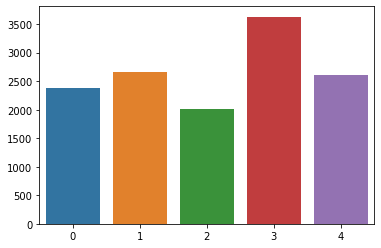

In [21]:
import collections

x,y = list(zip(*train_list))
count  = collections.Counter(y)
count
import seaborn as sns

#x=tweet.target.value_counts()
x = list(count.keys())
y = list(count.values())
sns.barplot(x=x,y=y)

In [ ]:
print(count)

Counter({3: 3630, 1: 2657, 4: 2615, 0: 2388, 2: 2010})


In [22]:
import random
import torch, torchtext.legacy
from torchtext.legacy import data

In [23]:
Review = data.Field(sequential = True, tokenize = 'spacy', batch_first =True, include_lengths=True, pad_first = True)
Label = data.LabelField(tokenize ='spacy', is_target=True, batch_first =True, sequential =False)

In [24]:
fields = [('reviews', Review),('labels',Label)]
fields

[('reviews', <torchtext.legacy.data.field.Field at 0x7fd4873c9a10>),
 ('labels', <torchtext.legacy.data.field.LabelField at 0x7fd444a15a50>)]

In [ ]:
#class_to_idx = 

In [25]:
example1 = [data.Example.fromlist([train_list[i][0], train_list[i][1]], fields) for i in range(len(train_list))]
example2 = [data.Example.fromlist([test_list[i][0], test_list[i][1]], fields) for i in range(len(test_list))]
#example_train = 

In [ ]:
example[0]

In [26]:
SEED = 43
torch.manual_seed(SEED) 

In [27]:
train = data.Dataset(example1, fields)
test = data.Dataset(example2,fields)

In [28]:
len(train_list) , len(test_list) 

(13300, 2371)

In [ ]:
#(train, valid) = reviewDataset.split(split_ratio=[0.8, 0.2], random_state=random.seed(SEED))

In [ ]:
vars(train.examples[60])

{'labels': 1,
 'reviews': ['A',
  'visually',
  'flashy',
  'but',
  'narratively',
  'opaque',
  'and',
  'emotionally',
  'vapid',
  'exercise',
  'in',
  'style',
  'and',
  'mystification',
  '.']}

In [29]:
Review.build_vocab(train)
Label.build_vocab(train)

In [30]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [31]:
train_iterator, valid_iterator = data.BucketIterator.splits((train, test), batch_size = 28, 
                                                            sort_key = lambda x: len(x.reviews),
                                                            sort_within_batch=True, device =device)

In [32]:
import os, pickle
with open('tokenizer.pkl', 'wb') as tokens: 
    pickle.dump(Review.vocab.stoi, tokens)

In [33]:
import torch.nn as nn
import torch.nn.functional as F

class classifier(nn.Module):
    
    # Define all the layers used in model
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers, dropout):
        
        super().__init__()          
        
        # Embedding layer
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        
        #RNN layer
        """
        self.encoder = nn.RNN(embedding_dim,
                              hidden_dim,
                              num_layers=n_layers, 
                              batch_first=True)

        # LSTM layer
        
        
        #GRU
        self.encoder = nn.GRU(embedding_dim, 
                              hidden_dim,
                              num_layers=n_layers,
                              dropout=dropout,
                              batch_first=True) 
        """
        self.encoder = nn.LSTM(embedding_dim, 
                           hidden_dim, 
                           num_layers=n_layers, 
                           dropout=dropout,
                           batch_first=True)
        
        # try using nn.GRU or nn.RNN here and compare their performances
        # try bidirectional and compare their performances
        self.drop = nn.Dropout(p=dropout)
        # Dense layer
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.sig = nn.Sigmoid()
        
    def forward(self, text, text_lengths):
        
        # text = [batch size, sent_length]
        embedded = self.drop(self.embedding(text))
        # embedded = [batch size, sent_len, emb dim]
      
        # packed sequence
        packed_embedded = nn.utils.rnn.pack_padded_sequence(embedded, text_lengths.cpu(), batch_first=True)
        
        #packed_output, hidden = self.encoder(packed_embedded)
        packed_output, (hidden,cell) = self.encoder(packed_embedded) #LSTM
        #hidden = [batch size, num layers * num directions,hid dim]
        #cell = [batch size, num layers * num directions,hid dim]
        hidden = self.drop(hidden)
        # Hidden = [batch size, hid dim * num directions]
        dense_outputs = self.fc(hidden)
        #print(dense_outputs[0])
        # Final activation function softmax
        output = F.softmax(dense_outputs[0], dim=1)
 
        #sig_out = self.sig(dense_outputs)
        
        # reshape to be batch_size first
        #Sig_out = sig_out.view(text[0], -1)

        #sig_out = sig_out[:, -1] # get last batch of labels
        
        # return last sigmoid output and hidden state
        #return sig_out, hidden
            
        return output

In [34]:
size_of_vocab = len(Review.vocab)
embedding_dim = 256
num_hidden_nodes = 50
num_output_nodes = 5
num_layers = 2
dropout = 0.3

# Instantiate the model
model = classifier(size_of_vocab, embedding_dim, num_hidden_nodes, num_output_nodes, num_layers, dropout = dropout)

In [35]:
print(model)

#No. of trianable parameters
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)
    
print(f'The model has {count_parameters(model):,} trainable parameters')

classifier(
  (embedding): Embedding(31303, 256)
  (encoder): LSTM(256, 50, num_layers=2, batch_first=True, dropout=0.3)
  (drop): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=50, out_features=5, bias=True)
  (sig): Sigmoid()
)
The model has 8,095,823 trainable parameters


In [36]:
import torch.optim as optim

# define optimizer and loss
optimizer = optim.Adam(model.parameters(), lr=1e-4) #2e-4
criterion = nn.CrossEntropyLoss()

# define metric
def binary_accuracy(preds, y):
    #round predictions to the closest integer
    _, predictions = torch.max(preds, 1)
    #print("pred   ", preds)
    #print("label   ", y)
    correct = (predictions == y).float() 
    acc = correct.sum() / len(correct)
    return acc
    
# push to cuda if available
model = model.to(device)
criterion = criterion.to(device)

In [37]:
def train(model, iterator, optimizer, criterion):
    
    # initialize every epoch 
    epoch_loss = 0
    epoch_acc = 0
    
    # set the model in training phase
    model.train()  
    i=0
    for batch in iterator:
        i+=1
        # resets the gradients after every batch
        optimizer.zero_grad()   
        
        # retrieve text and no. of words
        review, review_lengths = batch.reviews   
        
        # convert to 1D tensor
        predictions = model(review, review_lengths).squeeze()  
        
        # compute the loss
        loss = criterion(predictions, batch.labels)        
        
        # compute the binary accuracy
        acc = binary_accuracy(predictions, batch.labels)   
        
        # backpropage the loss and compute the gradients
        loss.backward()       
        
        # update the weights
        optimizer.step()   

        
        # loss and accuracy
        epoch_loss += loss.item()  
        epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [38]:
def evaluate(model, iterator, criterion):
    
    # initialize every epoch
    epoch_loss = 0
    epoch_acc = 0

    # deactivating dropout layers
    model.eval()
    
    # deactivates autograd
    with torch.no_grad():
    
        for batch in iterator:
        
            # retrieve text and no. of words
            #print("\nbatch.reviews  {}".format(batch.reviews))
            review, review_lengths = batch.reviews
            #print("review {}\nreview lengths{}".format(review,review_lengths))

            # convert to 1d tensor
            #print("model.sqeeze: {}".format(model(review, review_lengths).squeeze()))
            predictions = model(review, review_lengths).squeeze()
            #print("prediction {}".format(predictions))

            # compute loss and accuracy
            loss = criterion(predictions, batch.labels)
            acc = binary_accuracy(predictions, batch.labels)
            #print("loss: {}\nloss.item: {}\n acc: {}\n acc.item{}".format(loss,loss.item,acc,acc.item))
            # keep track of loss and accuracy

            epoch_loss += loss.item()
            epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [39]:
N_EPOCHS = 200
best_valid_loss = float('inf')
i=0
valid_acc_list = []
train_acc_list = []
for epoch in range(N_EPOCHS):
    i+=1
    # train the model
    #print("Model : {0} \ntrain iterator {1}\noptmiser {2}\nCriterion {3}".format(model,train_iterator,optimizer, criterion))
    train_loss, train_acc = train(model, train_iterator, optimizer, criterion)
    train_acc_list.append(train_acc)
  
    # evaluate the model
    #print("\nvalid") 
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion)
    valid_acc_list.append(valid_acc)
    # save the best model
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'saved_weights.pt')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}% \n')
print(max(valid_acc_list))

	Train Loss: 1.601 | Train Acc: 25.44%
	 Val. Loss: 1.596 |  Val. Acc: 25.27% 

	Train Loss: 1.596 | Train Acc: 26.26%
	 Val. Loss: 1.595 |  Val. Acc: 24.64% 

	Train Loss: 1.595 | Train Acc: 26.61%
	 Val. Loss: 1.594 |  Val. Acc: 23.97% 

	Train Loss: 1.593 | Train Acc: 26.95%
	 Val. Loss: 1.593 |  Val. Acc: 23.94% 

	Train Loss: 1.591 | Train Acc: 27.58%
	 Val. Loss: 1.592 |  Val. Acc: 23.73% 

	Train Loss: 1.589 | Train Acc: 27.72%
	 Val. Loss: 1.592 |  Val. Acc: 23.58% 

	Train Loss: 1.586 | Train Acc: 28.23%
	 Val. Loss: 1.591 |  Val. Acc: 23.58% 

	Train Loss: 1.583 | Train Acc: 28.23%
	 Val. Loss: 1.588 |  Val. Acc: 24.30% 

	Train Loss: 1.579 | Train Acc: 29.05%
	 Val. Loss: 1.587 |  Val. Acc: 25.01% 

	Train Loss: 1.574 | Train Acc: 29.60%
	 Val. Loss: 1.589 |  Val. Acc: 25.04% 

	Train Loss: 1.566 | Train Acc: 30.75%
	 Val. Loss: 1.587 |  Val. Acc: 26.55% 

	Train Loss: 1.559 | Train Acc: 31.80%
	 Val. Loss: 1.582 |  Val. Acc: 27.68% 

	Train Loss: 1.548 | Train Acc: 33.22%
	

In [ ]:
N_EPOCHS = 300
best_valid_loss = float('inf')


epochi = 0
train_acc_list = []
valid_acc_list = []

for epoch in range(N_EPOCHS):

    epochi += 1 
    
    # train the model
    train_loss, train_acc = train(model, train_iterator, optimizer, criterion)
    train_acc_list.append(train_acc)

    preds_actual_tup = []
    # evaluate the model
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion, preds_actual_tup)
    valid_acc_list.append(valid_acc)
    
    # save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'saved_weights.pt')
    print(epochi)
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}% \n')
    if epochi%20 == 0:
      print(f'\t pred 22tuals: {get_pred_vs_act_per_label(preds_actual_tup)}')


In [45]:
def get_pred_vs_act_per_label(pred_act):
  preds, act = list(zip(*pred_act))
  predictions = []
  actuals = []
  for i in preds:
    _, pred = torch.max(i, 1)
    for j in pred:
      predictions.append(j.item())
  for i in act:
    for j in i:
      actuals.append(j.item())
  assert len(predictions) == len(actuals)
  label_dict = {}
  for i in range(0, len(actuals)):
    predic = predictions[i]
    actual = actuals[i]
    if label_dict.get(actual, None) != None:
      in_dict = label_dict[actual]
      if in_dict.get(predic, None) != None:
        in_dict[predic] += 1
      else:
        in_dict[predic] = 1
    else:
      in_dict = {predic: 1}
    label_dict[actual] = in_dict
  print("label distribution: actual vs pred:", label_dict)
  return label_dict

In [51]:
#load weights and tokenizer

path='./saved_weights.pt'
model.load_state_dict(torch.load(path));
model.eval();
tokenizer_file = open('./tokenizer.pkl', 'rb')
tokenizer = pickle.load(tokenizer_file)

#inference 

import spacy
nlp = spacy.load('en')

def classify_review(review):
  categories = {0: "Very Negative", 1: "Negative", 2: "Neutral", 3:"Positive", 4:"Very Positive"}
  # tokenize the review 
  tokenized = [tok.text for tok in nlp.tokenizer(review)]
  # convert to integer sequence using predefined tokenizer dictionary
  indexed = [tokenizer[t] for t in tokenized]
  # compute no. of words        
  length = [len(indexed)]
  # convert to tensor                                    
  tensor = torch.LongTensor(indexed).to(device)
  # reshape in form of batch, no. of words           
  tensor = tensor.unsqueeze(1).T
  # convert to tensor                          
  length_tensor = torch.LongTensor(length)
  # Get the model prediction                  
  prediction = model(tensor, length_tensor)
  _, pred = torch.max(prediction, 1) 
  return categories[pred.item()], pred.item()

In [60]:
def classify_and_print(test_list):
  for i in test_list:
    x,y = i
    cat = {0: "Very Negative", 1: "Negative", 2: "Neutral", 3:"Positive", 4:"Very Positive"}
    actual_label = cat[y]
    predicted_label_str, predicted_label = classify_review(x)
    print("sentence: ", x)
    print("actual_label:", actual_label, "predicted_label:", predicted_label_str)
    print("")
testdata_to_test = random.sample(test_list, 25)
classify_and_print(testdata_to_test)

sentence:  With generic sets and B-grade special effects , Jason is about as convincing on the sci-fi front as TV 's defunct Cleopatra 2525 .
actual_label: Negative predicted_label: Negative

sentence:  Not so much funny as aggressively sitcom-cute , it 's full of throwaway one-liners , not-quite jokes , and a determined TV amiability that Allen personifies .
actual_label: Negative predicted_label: Negative

sentence:  Even horror fans will most likely not find what they 're seeking with Trouble Every Day ; the movie lacks both thrills and humor .
actual_label: Very Negative predicted_label: Negative

sentence:  Purely propaganda , a work of unabashed hero worship , it is nonetheless -- and likely inadvertently -- a timely and invaluable implicit reminder of the role that U.S. foreign policy has played in the rise of Castro .
actual_label: Neutral predicted_label: Very Negative

sentence:  It is intensely personal and yet -- unlike Quills -- deftly shows us the temper of the times .
ac

In [61]:
count = 0
false_pos_list = []
for i in test_list:
  x,y = i
  _, predicted_label = classify_review(x)
  if predicted_label in [3,4] and y in [0,1]:
    false_pos_list.append(i)
    count += 1
    if count == 10:
      break
print(false_pos_list)
classify_and_print(false_pos_list)


[('It made me want to wrench my eyes out of my head and toss them at the screen .', 1), ('... plot holes so large and obvious a marching band might as well be stomping through them in clown clothes , playing a college football fight song on untuned instruments .', 0), ('So devoid of any kind of intelligible story that it makes films like XXX and Collateral Damage seem like thoughtful treatises', 0), ('Dragonfly has no atmosphere , no tension -- nothing but Costner , flailing away .', 0), ("It 's a buggy drag .", 1), ("Nonsensical , dull `` cyber-horror '' flick is a grim , hollow exercise in flat scares and bad acting .", 0), ('Instead of hiding Pinocchio from critics , Miramax should have hidden it from everyone .', 0), ('The tale of Tok ( Andy Lau ) , a sleek sociopath on the trail of O ( Takashi Sorimachi ) , the most legendary of Asian hitmen , is too scattershot to take hold .', 1), ('Directed in a paint-by-numbers manner .', 1), ("A lackluster , unessential sequel to the classic 

In [ ]:
import pandas as pd

#sentences = pd.read_csv("/content/datasetSentences.txt", sep='\t')
#phrase = pd.read_csv("/content/dictionary.txt", sep='|')

In [ ]:
sentences.head()
sentences['sentence'].dtype

In [ ]:
phrase.columns = ['sentence', 'id']
phrase.head()
phrase['sentence'].ast

In [ ]:
sentences.info()

In [ ]:
phrase.info()

In [ ]:
join_df = sentences.join(phrase,on='sentence' ,how='left', lsuffix='left_')


In [ ]:
join_df.shape

In [ ]:
df_merge = pd.merge(sentences, phrase, how='inner', on='sentence')

In [ ]:
df_merge.shape